### Name: Riad Mohammed
### Class : CSE 4510 BIG DATA
### Activity: 4
### Due Date: Saturday 5th November, 2022

### 1- Data Cleaning

#### (a) (1 point) Create a parallelized Spark Context (local[*]) and use it to complete the assignment.


In [1]:
import findspark # makes pyspark work on my machine
findspark.init() # credit to Nikhil Agarwal on stackoverflow for this fix

In [2]:
%env PYSPARK_DRIVER_PYTHON=jupyter ./bin/pyspark

env: PYSPARK_DRIVER_PYTHON=jupyter ./bin/pyspark


In [3]:
from pyspark.sql import SparkSession
# Create a DataFrame using SparkSession
spark = (SparkSession
      .builder
      .appName("Activity4")
      .master("local[*]")
      .getOrCreate())

#### (b) (1 point) Read the dataset using 0.1% sampling ratio to infer the schema.


In [4]:
dataset = "/Users/Riad/Desktop/cse4510_Big_Data_assignments/assignment_4/Fire_Department_Calls_for_Service.csv"

In [5]:
fire_data = spark\
.read\
.option("samplingRatio", 0.01)\
.option("header", "true")\
.csv(dataset)

In [6]:
print(fire_data.take(1))

[Row(Call Number='221210313', Unit ID='E36', Incident Number='22054955', Call Type='Outside Fire', Call Date='05/01/2022', Watch Date='04/30/2022', Received DtTm='05/01/2022 02:58:25 AM', Entry DtTm='05/01/2022 02:59:15 AM', Dispatch DtTm='05/01/2022 02:59:25 AM', Response DtTm='05/01/2022 03:01:06 AM', On Scene DtTm='05/01/2022 03:02:27 AM', Transport DtTm=None, Hospital DtTm=None, Call Final Disposition='Fire', Available DtTm='05/01/2022 03:05:00 AM', Address='GOUGH ST/GROVE ST', City='San Francisco', Zipcode of Incident='94102', Battalion='B02', Station Area='36', Box='3265', Original Priority='3', Priority='3', Final Priority='3', ALS Unit='true', Call Type Group='Fire', Number of Alarms='1', Unit Type='ENGINE', Unit sequence in call dispatch='1', Fire Prevention District='2', Supervisor District='5', Neighborhooods - Analysis Boundaries='Hayes Valley', RowID='221210313-E36', case_location='POINT (-122.42316555403964 37.77781524520032)', Analysis Neighborhoods='9')]


#### (c) (2 points) Create a new column named Delay, which is the difference in minutes (rounded to 2DP) between Response DtTm and Received DtTm. Display the Response DtTm, Received DtTm, and Delay for the record with CallNumber 203350320.


In [7]:
from pyspark.sql import functions as f

fire_data_new = (fire_data
                   .withColumn("Delay",f.round((f.to_timestamp(f.col("Response DtTm"),"MM/dd/yyyy hh:mm:ss a").cast("long")-
                    f.to_timestamp(f.col("Received DtTm"),"MM/dd/yyyy hh:mm:ss a").cast("long"))/60,2)))

#Select Columns
(fire_data_new
 .select("Response DtTm","Received DtTm","Delay").where(f.col("Call Number")==203350320).show(truncate=False))

+----------------------+----------------------+-----+
|Response DtTm         |Received DtTm         |Delay|
+----------------------+----------------------+-----+
|11/30/2020 06:24:05 AM|11/30/2020 06:21:14 AM|2.85 |
|null                  |11/30/2020 06:21:14 AM|null |
|null                  |11/30/2020 06:21:14 AM|null |
|11/30/2020 06:23:56 AM|11/30/2020 06:21:14 AM|2.7  |
|11/30/2020 06:22:45 AM|11/30/2020 06:21:14 AM|1.52 |
+----------------------+----------------------+-----+



#### (d) (2 points) Drop the following columns from the dataset and arrange the data such that the same schema from the tutorial given in class can be used to read the dataset: Received DtTm, Entry DtTm, Dispatch DtTm, Response DtTm, On Scene DtTm, Transport DtTm, Hospital DtTm


In [8]:
#Columns dropped to ensure data is arranged like the schema in the tutorial
fire_data_new.drop("Received DtTm","Entry DtTm","Dispatch DtTm","Response DtTm",
                    "On Scene DtTm","Transport DtTm","Hospital DtTm","Analysis Neighborhoods")

fire_data_new2 = fire_data_new.withColumnRenamed("Neighborhooods - Analysis Boundaries","Neighborhood")


In [9]:
#Rearrange data such to match schema from tutorial
fire_data_new3 = fire_data_new2.select("Call Number","Unit ID","Incident Number","Call Type","Call Date","Watch Date",
                                     "Call Final Disposition","Available DtTm","Address","City","Zipcode of Incident",
                                     "Battalion","Station Area","Box","Original Priority","Priority","Final Priority",
                                     "ALS unit","Call Type Group","Number of Alarms","Unit Type","Unit sequence in call dispatch",
                                     "Fire Prevention District","Supervisor District","Neighborhood","case_location","RowID","Delay")

In [10]:
fire_data_new3

DataFrame[Call Number: string, Unit ID: string, Incident Number: string, Call Type: string, Call Date: string, Watch Date: string, Call Final Disposition: string, Available DtTm: string, Address: string, City: string, Zipcode of Incident: string, Battalion: string, Station Area: string, Box: string, Original Priority: string, Priority: string, Final Priority: string, ALS unit: string, Call Type Group: string, Number of Alarms: string, Unit Type: string, Unit sequence in call dispatch: string, Fire Prevention District: string, Supervisor District: string, Neighborhood: string, case_location: string, RowID: string, Delay: double]

#### (e) (2 points) Save the modified dataset with only the columns featured in the in-class tutorial to a single CSV file


In [11]:
# Write CSV file with column header (column names)
fire_data_new3.write.option("header",True) \
 .csv("/Users/Riad/Desktop/cse4510_Big_Data_assignments/assignment_4/Fire_Department_Calls_for_Service_new.csv")


#### (f) (1 point) Read the updated dataset using the schema provided in the in-class tutorial


In [12]:
#Following code taken from spark tutorial

from pyspark.sql.types import *
# Programmatic way to define a schema
fire_schema = StructType([StructField('CallNumber', IntegerType(), True),
StructField('UnitID', StringType(), True),
StructField('IncidentNumber', IntegerType(), True),
StructField('CallType', StringType(), True),
StructField('CallDate', StringType(), True),
StructField('WatchDate', StringType(), True),
StructField('CallFinalDisposition', StringType(), True),
StructField('AvailableDtTm', StringType(), True),
StructField('Address', StringType(), True),
StructField('City', StringType(), True),
StructField('Zipcode', IntegerType(), True),
StructField('Battalion', StringType(), True),
StructField('StationArea', StringType(), True),
StructField('Box', StringType(), True),
StructField('OriginalPriority', StringType(), True),
StructField('Priority', StringType(), True),
StructField('FinalPriority', IntegerType(), True),
StructField('ALSUnit', BooleanType(), True),
StructField('CallTypeGroup', StringType(), True),
StructField('NumAlarms', IntegerType(), True),
StructField('UnitType', StringType(), True),
StructField('UnitSequenceInCallDispatch', IntegerType(), True),
StructField('FirePreventionDistrict', StringType(), True),
StructField('SupervisorDistrict', StringType(), True),
StructField('Neighborhood', StringType(), True),
StructField('Location', StringType(), True),
StructField('RowID', StringType(), True),
StructField('Delay', FloatType(), True)])

In [13]:
#Reading the data from csv using Spark Tutorial
fire_df = spark.read.csv("Fire_Department_Calls_for_Service_new.csv",header=True,schema=fire_schema)

In [14]:
fire_df.head()

Row(CallNumber=210672181, UnitID='60', IncidentNumber=21029695, CallType='Medical Incident', CallDate='03/08/2021', WatchDate='03/08/2021', CallFinalDisposition='No Merit', AvailableDtTm='03/08/2021 04:17:22 PM', Address='3900 Block of 17TH ST', City='San Francisco', Zipcode=94114, Battalion='B05', StationArea='06', Box='5417', OriginalPriority='2', Priority='2', FinalPriority=2, ALSUnit=True, CallTypeGroup='Potentially Life-Threatening', NumAlarms=1, UnitType='MEDIC', UnitSequenceInCallDispatch=1, FirePreventionDistrict='5', SupervisorDistrict='8', Neighborhood='Castro/Upper Market', Location='POINT (-122.43466870920955 37.762572353742755)', RowID='210672181-60', Delay=5.320000171661377)

#### (g) (1 point) Return a list of 10 Distinct Call Types

In [15]:
distinct_call = fire_df.select("CallType").where(f.col("CallType").isNotNull()).distinct()

distinct_call.show(10,False)

+-----------------------------------+
|CallType                           |
+-----------------------------------+
|Elevator / Escalator Rescue        |
|Marine Fire                        |
|Aircraft Emergency                 |
|Confined Space / Structure Collapse|
|Administrative                     |
|Alarms                             |
|Odor (Strange / Unknown)           |
|Citizen Assist / Service Call      |
|HazMat                             |
|Watercraft in Distress             |
+-----------------------------------+
only showing top 10 rows



#### (h) (1 point) Return a count of the distinct Call Types

In [16]:
(fire_df.groupBy("CallType").count().show(10,False))

+-----------------------------------+------+
|CallType                           |count |
+-----------------------------------+------+
|Elevator / Escalator Rescue        |16542 |
|Marine Fire                        |492   |
|Aircraft Emergency                 |1512  |
|Confined Space / Structure Collapse|677   |
|Administrative                     |307   |
|Alarms                             |664827|
|Odor (Strange / Unknown)           |13373 |
|Citizen Assist / Service Call      |89491 |
|HazMat                             |4300  |
|Watercraft in Distress             |1132  |
+-----------------------------------+------+
only showing top 10 rows



#### (i) (1 point) Rename the Delay column to ResponseDelayedinMins and return the top 5 records (sorted by ResponseDelayedinMins in descending order) where ResponseDelayedinMins > 5 (Show only the ResponseDelayedinMins column in your output)



In [17]:
new_fire_df = fire_df.withColumnRenamed("Delay","ResponseDelayedinMins")

(new_fire_df.select("ResponseDelayedinMins").where(f.col("ResponseDelayedinMins")>5).orderBy("ResponseDelayedinMins",ascending=False).show(5,False))

+---------------------+
|ResponseDelayedinMins|
+---------------------+
|2465.28              |
|2234.07              |
|2176.63              |
|1997.77              |
|1879.62              |
+---------------------+
only showing top 5 rows



#### (j) (2 points) Return a list of the top 10 delayed Fire Responses sorted in descending order and showing the Call Type, Address (Full address in title-case in one column including City and Zip Code), Battalion, ResponseDelayedinMins, and Unit Type

In [19]:
new_fire_df.select("CallType",f.concat(f.col("Address"),f.lit(','),f.col("City"),f.lit(','),f.col("Zipcode")),
                   "Battalion","ResponseDelayedinMins","UnitType").orderBy("ResponseDelayedinMins",ascending=False).show(10,truncate=False)

+----------------------------------+---------------------------------------------+---------+---------------------+-------------+
|CallType                          |concat(Address, ,, City, ,, Zipcode)         |Battalion|ResponseDelayedinMins|UnitType     |
+----------------------------------+---------------------------------------------+---------+---------------------+-------------+
|Structure Fire                    |200 Block of JEFFERSON ST,San Francisco,94133|B01      |2465.28              |ENGINE       |
|Structure Fire                    |200 Block of JEFFERSON ST,San Francisco,94133|B01      |2234.07              |ENGINE       |
|Mutual Aid / Assist Outside Agency|null                                         |B06      |2176.63              |ENGINE       |
|Structure Fire                    |200 Block of JEFFERSON ST,San Francisco,94133|B01      |1997.77              |ENGINE       |
|Structure Fire                    |1300 Block of MISSION ST,SF,94103            |B02      |1879.

#### (k) (2 points) Create a horizontal bar chart of the top 10 delayed Fire Responses (ResponseDelayedinMins vs Call Number)


<AxesSubplot:ylabel='ResponseDelayedinMins'>

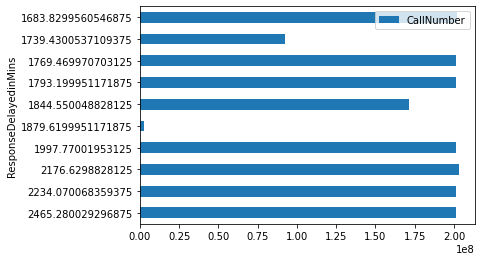

In [20]:
import pandas as pd
from matplotlib import pyplot as plt 

response_call = new_fire_df.select("ResponseDelayedinMins","CallNumber").orderBy("ResponseDelayedinMins",ascending=False).toPandas().head(10)
#call = new_fire_df.select("CallNumber").orderBy("CallNumber",ascending=False).toPandas().head(10)
#df = [response,call]
#graph = pd.concat(df)

response_call.plot(kind="barh",x="ResponseDelayedinMins",y="CallNumber")



#### (l) (2 points) Convert the following fields to date: CallDate, WatchDate, AvailableDtTm

In [21]:
#Code taken from tutorial slides
from pyspark.sql import functions as f

new_fire_df2 = (new_fire_df
                .withColumn("IncidentDate",f.to_timestamp(f.col("CallDate"), "MM/dd/yyyy"))
                            .drop("CallDate")
                            .withColumn("OnWatchDate", f.to_timestamp(f.col("WatchDate"), "MM/dd/yyyy"))
                            .drop("WatchDate")
                            .withColumn("AvailableDtTS", f.to_timestamp(f.col("AvailableDtTm"), "MM/dd/yyyy hh:mm:ss a"))
                            .drop("AvailableDtTm"))

# Select the converted columns
(new_fire_df2
.select("IncidentDate", "OnWatchDate", "AvailableDtTS")
.show(5, False))

+-------------------+-------------------+-------------------+
|IncidentDate       |OnWatchDate        |AvailableDtTS      |
+-------------------+-------------------+-------------------+
|2021-03-08 00:00:00|2021-03-08 00:00:00|2021-03-08 16:17:22|
|2021-03-08 00:00:00|2021-03-08 00:00:00|2021-03-08 16:15:48|
|2021-03-08 00:00:00|2021-03-08 00:00:00|2021-03-08 17:36:11|
|2021-03-08 00:00:00|2021-03-08 00:00:00|2021-03-08 18:12:14|
|2021-03-08 00:00:00|2021-03-08 00:00:00|2021-03-08 16:09:33|
+-------------------+-------------------+-------------------+
only showing top 5 rows



#### (m) (2 points) Show a complete list of the distinct years represented in the dataset based on the IncidentDate

In [22]:
(new_fire_df2.select(f.year('IncidentDate')).distinct().orderBy(f.year('IncidentDate')).show(24))

+------------------+
|year(IncidentDate)|
+------------------+
|              2000|
|              2001|
|              2002|
|              2003|
|              2004|
|              2005|
|              2006|
|              2007|
|              2008|
|              2009|
|              2010|
|              2011|
|              2012|
|              2013|
|              2014|
|              2015|
|              2016|
|              2017|
|              2018|
|              2019|
|              2020|
|              2021|
|              2022|
+------------------+



## 2) EDA

#### (a) (2 points) Create a MonthYear Column in the dataset of the format YYYYMM (eg: 202209) based on the IncidentDate

In [23]:
new_fire_df3 = new_fire_df2.withColumn("MonthYear",f.date_format(f.col("IncidentDate"),'yyyyMM'))

new_fire_df3.select("MonthYear").distinct().orderBy("MonthYear",ascending=True).show()

+---------+
|MonthYear|
+---------+
|   200004|
|   200005|
|   200006|
|   200007|
|   200008|
|   200009|
|   200010|
|   200011|
|   200012|
|   200101|
|   200102|
|   200103|
|   200104|
|   200105|
|   200106|
|   200107|
|   200108|
|   200109|
|   200110|
|   200111|
+---------+
only showing top 20 rows



#### (b) (10 points) Create an in-memory DataFrame that stores the Temperature and the MonthYear from Global Summary of the Month (GSOM) data dynamically harvested from the NOAA API from the weather station located Downtown, San Francisco.


In [24]:
api_key = open("token.txt","r").read()
#api_key read from file

In [25]:
import requests
from pprint import pprint

#api_key = open("token.txt").read()
headers = {'token':api_key}
#dataset = 'https://www.ncei.noaa.gov/cdo-web/api/v2/datasets'
#location = 'https://www.ncei.noaa.gov/cdo-web/api/v2/locations'
#datatype = 'https://www.ncei.noaa.gov/cdo-web/api/v2/datatypes?datasetid=GSOM&datacategoryid=TEMP'
#sanfraninfo = 'https://www.ncei.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06075&sortfield=mindate'

pageurl =[
    'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&stationid=GHCND:USW00023272&datatypeid=TAVG&startdate=2000-01-01&enddate=2009-12-31&limit=1000&offset=',
    'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&stationid=GHCND:USW00023272&datatypeid=TAVG&startdate=2009-01-01&enddate=2018-12-31&limit=1000&offset=',
    'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&stationid=GHCND:USW00023272&datatypeid=TAVG&startdate=2018-01-01&enddate=2022-12-31&limit=1000&offset='
]




temperature = []

for url in pageurl:
    offset = 1

    #Pagination
    while True:
        response = requests.get(url + str(offset), headers=headers)
    
        if response.status_code == 200:
            json = response.json()
            count = json['metadata']['resultset']['count']
            limit = json['metadata']['resultset']['limit']
            offset = json['metadata']['resultset']['offset']
        
            temperature.extend(json['results'])
            if offset*limit < count:
                offset += 1
            else:
                break
        else:
            print(response.content)
            break;


In [26]:
response.status_code

200

In [27]:
temperature

[{'date': '2000-01-01T00:00:00',
  'datatype': 'TAVG',
  'station': 'GHCND:USW00023272',
  'attributes': ',0',
  'value': 11.46},
 {'date': '2000-02-01T00:00:00',
  'datatype': 'TAVG',
  'station': 'GHCND:USW00023272',
  'attributes': ',0',
  'value': 12.13},
 {'date': '2000-03-01T00:00:00',
  'datatype': 'TAVG',
  'station': 'GHCND:USW00023272',
  'attributes': ',0',
  'value': 12.74},
 {'date': '2000-04-01T00:00:00',
  'datatype': 'TAVG',
  'station': 'GHCND:USW00023272',
  'attributes': ',0',
  'value': 13.95},
 {'date': '2000-05-01T00:00:00',
  'datatype': 'TAVG',
  'station': 'GHCND:USW00023272',
  'attributes': ',0',
  'value': 14.59},
 {'date': '2000-06-01T00:00:00',
  'datatype': 'TAVG',
  'station': 'GHCND:USW00023272',
  'attributes': ',0',
  'value': 15.28},
 {'date': '2000-07-01T00:00:00',
  'datatype': 'TAVG',
  'station': 'GHCND:USW00023272',
  'attributes': ',0',
  'value': 14.63},
 {'date': '2000-08-01T00:00:00',
  'datatype': 'TAVG',
  'station': 'GHCND:USW00023272',
 

In [28]:
for i in temperature:
    i['value']=float(i['value'])

In [29]:
#from pyspark.sql import SparkSession

#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(temperature) 
sparkDF.printSchema()




root
 |-- attributes: string (nullable = true)
 |-- datatype: string (nullable = true)
 |-- date: string (nullable = true)
 |-- station: string (nullable = true)
 |-- value: double (nullable = true)



In [31]:
sparkDF.show(5)

+----------+--------+-------------------+-----------------+-----+
|attributes|datatype|               date|          station|value|
+----------+--------+-------------------+-----------------+-----+
|        ,0|    TAVG|2000-01-01T00:00:00|GHCND:USW00023272|11.46|
|        ,0|    TAVG|2000-02-01T00:00:00|GHCND:USW00023272|12.13|
|        ,0|    TAVG|2000-03-01T00:00:00|GHCND:USW00023272|12.74|
|        ,0|    TAVG|2000-04-01T00:00:00|GHCND:USW00023272|13.95|
|        ,0|    TAVG|2000-05-01T00:00:00|GHCND:USW00023272|14.59|
+----------+--------+-------------------+-----------------+-----+
only showing top 5 rows



In [32]:
temp_df = (sparkDF.drop("attributes","datatype","station"))
temp_df.show(5)

+-------------------+-----+
|               date|value|
+-------------------+-----+
|2000-01-01T00:00:00|11.46|
|2000-02-01T00:00:00|12.13|
|2000-03-01T00:00:00|12.74|
|2000-04-01T00:00:00|13.95|
|2000-05-01T00:00:00|14.59|
+-------------------+-----+
only showing top 5 rows



In [35]:
temp_df2 = temp_df.withColumn("MonthYear",f.date_format(f.col("date"),'yyyyMM'))
temp_df2 = temp_df2.drop("date").withColumnRenamed("value","Temperature(C)")

temp_df2.show(5)

+--------------+---------+
|Temperature(C)|MonthYear|
+--------------+---------+
|         11.46|   200001|
|         12.13|   200002|
|         12.74|   200003|
|         13.95|   200004|
|         14.59|   200005|
+--------------+---------+
only showing top 5 rows



#### (c) (5 points) Augment the dataset with the temperature data and group the data by MonthYear

In [86]:
augment_df_final7 = (new_fire_df3.select('MonthYear').groupBy('MonthYear').count().orderBy('count'))

In [87]:
augment_df_final7.show()

+---------+-----+
|MonthYear|count|
+---------+-----+
|   202211| 1836|
|   200004|10059|
|   202204|16067|
|   200109|16800|
|   200102|16968|
|   200011|17501|
|   200502|17515|
|   200411|17747|
|   200104|17751|
|   200204|17783|
|   200111|17885|
|   200504|17913|
|   200702|17995|
|   200209|18016|
|   200206|18129|
|   200207|18142|
|   200302|18204|
|   200006|18233|
|   200107|18243|
|   200208|18397|
+---------+-----+
only showing top 20 rows



In [88]:
aug_final_df7 = augment_df_final7.join(temp_df2,'MonthYear',how='inner').distinct().orderBy('count')
#test = aug_final_df.select('MonthYear','count','Temperature(C)')
aug_final_df7.show()

+---------+-----+--------------+
|MonthYear|count|Temperature(C)|
+---------+-----+--------------+
|   200004|10059|         13.95|
|   202204|16067|         13.19|
|   200109|16800|         16.12|
|   200102|16968|         11.15|
|   200011|17501|         12.11|
|   200502|17515|         13.25|
|   200411|17747|         13.62|
|   200104|17751|         11.38|
|   200204|17783|         12.69|
|   200111|17885|         14.79|
|   200504|17913|         13.29|
|   200702|17995|         11.67|
|   200209|18016|          16.4|
|   200206|18129|         14.45|
|   200207|18142|          15.1|
|   200302|18204|         12.56|
|   200006|18233|         15.28|
|   200107|18243|         15.82|
|   200208|18397|         15.77|
|   200108|18413|          16.4|
+---------+-----+--------------+
only showing top 20 rows



In [90]:
#CREATED FOR TEST PURPOSES
from pyspark.sql.functions import col
TEST = aug_final_df7.withColumn("Far", (col("Temperature(C)") * 1.8) + 32)
TEST.show()

+---------+-----+--------------+------------------+
|MonthYear|count|Temperature(C)|               Far|
+---------+-----+--------------+------------------+
|   200004|10059|         13.95|             57.11|
|   202204|16067|         13.19|55.742000000000004|
|   200109|16800|         16.12|61.016000000000005|
|   200102|16968|         11.15|             52.07|
|   200011|17501|         12.11|            53.798|
|   200502|17515|         13.25|             55.85|
|   200411|17747|         13.62|            56.516|
|   200104|17751|         11.38|            52.484|
|   200204|17783|         12.69|            54.842|
|   200111|17885|         14.79|            58.622|
|   200504|17913|         13.29|            55.922|
|   200702|17995|         11.67|            53.006|
|   200209|18016|          16.4|61.519999999999996|
|   200206|18129|         14.45|             58.01|
|   200207|18142|          15.1|             59.18|
|   200302|18204|         12.56|54.608000000000004|
|   200006|1

#### (d) (3 points) Answer the following question: Is there correlation between the average monthly temperature and the number of fire calls per month?


In [89]:
aug_final_df7.stat.corr('Temperature(C)','count')

0.12783543817540277

In [91]:
TEST.stat.corr('Far','count')

0.12783543817540302

#### Since the correlation seen above is positive, there is a positive correlation between the average monthly temperature and the number of fire calls per month